In [369]:
"""Plotting parameters"""
from matplotlib import rcParams
#rcParams['axes.formatter.limits'] = (-7, 7)
rcParams['axes.formatter.limits'] = (-2,3)
rcParams['axes.labelsize'] = 22
rcParams['xtick.labelsize'] = 22
rcParams['ytick.labelsize'] = 22
rcParams['font.size'] = 22

In [326]:
"""Import packages"""
import datetime
import xarray as xr
import numpy as np
import matplotlib.pyplot as pl
import scipy.io as sio
%matplotlib inline

In [356]:
pl.style.use('default')

In [327]:
"""Get openDAP URL and download data"""
url='http://tds.marine.rutgers.edu/thredds/dodsC/roms/ecb/ches/chesroms_ecb_1980-2014/avg' 

ds = xr.open_dataset(url)

# slicing throught the time, xi_u and eta_u dimensions
Huon =ds.sel(ocean_time=slice('2006','2011'),xi_u=59,eta_u=slice(10, 25)).Huon
Huon_semilabileDOC =ds.sel(ocean_time=slice('2006','2011'),xi_u=59,eta_u=slice(10, 25)).Huon_semilabileDOC
Huon_refractoryDOC =ds.sel(ocean_time=slice('2006','2011'),xi_u=59,eta_u=slice(10, 25)).Huon_refractoryDOC
Huon_DOC=Huon_semilabileDOC+Huon_refractoryDOC

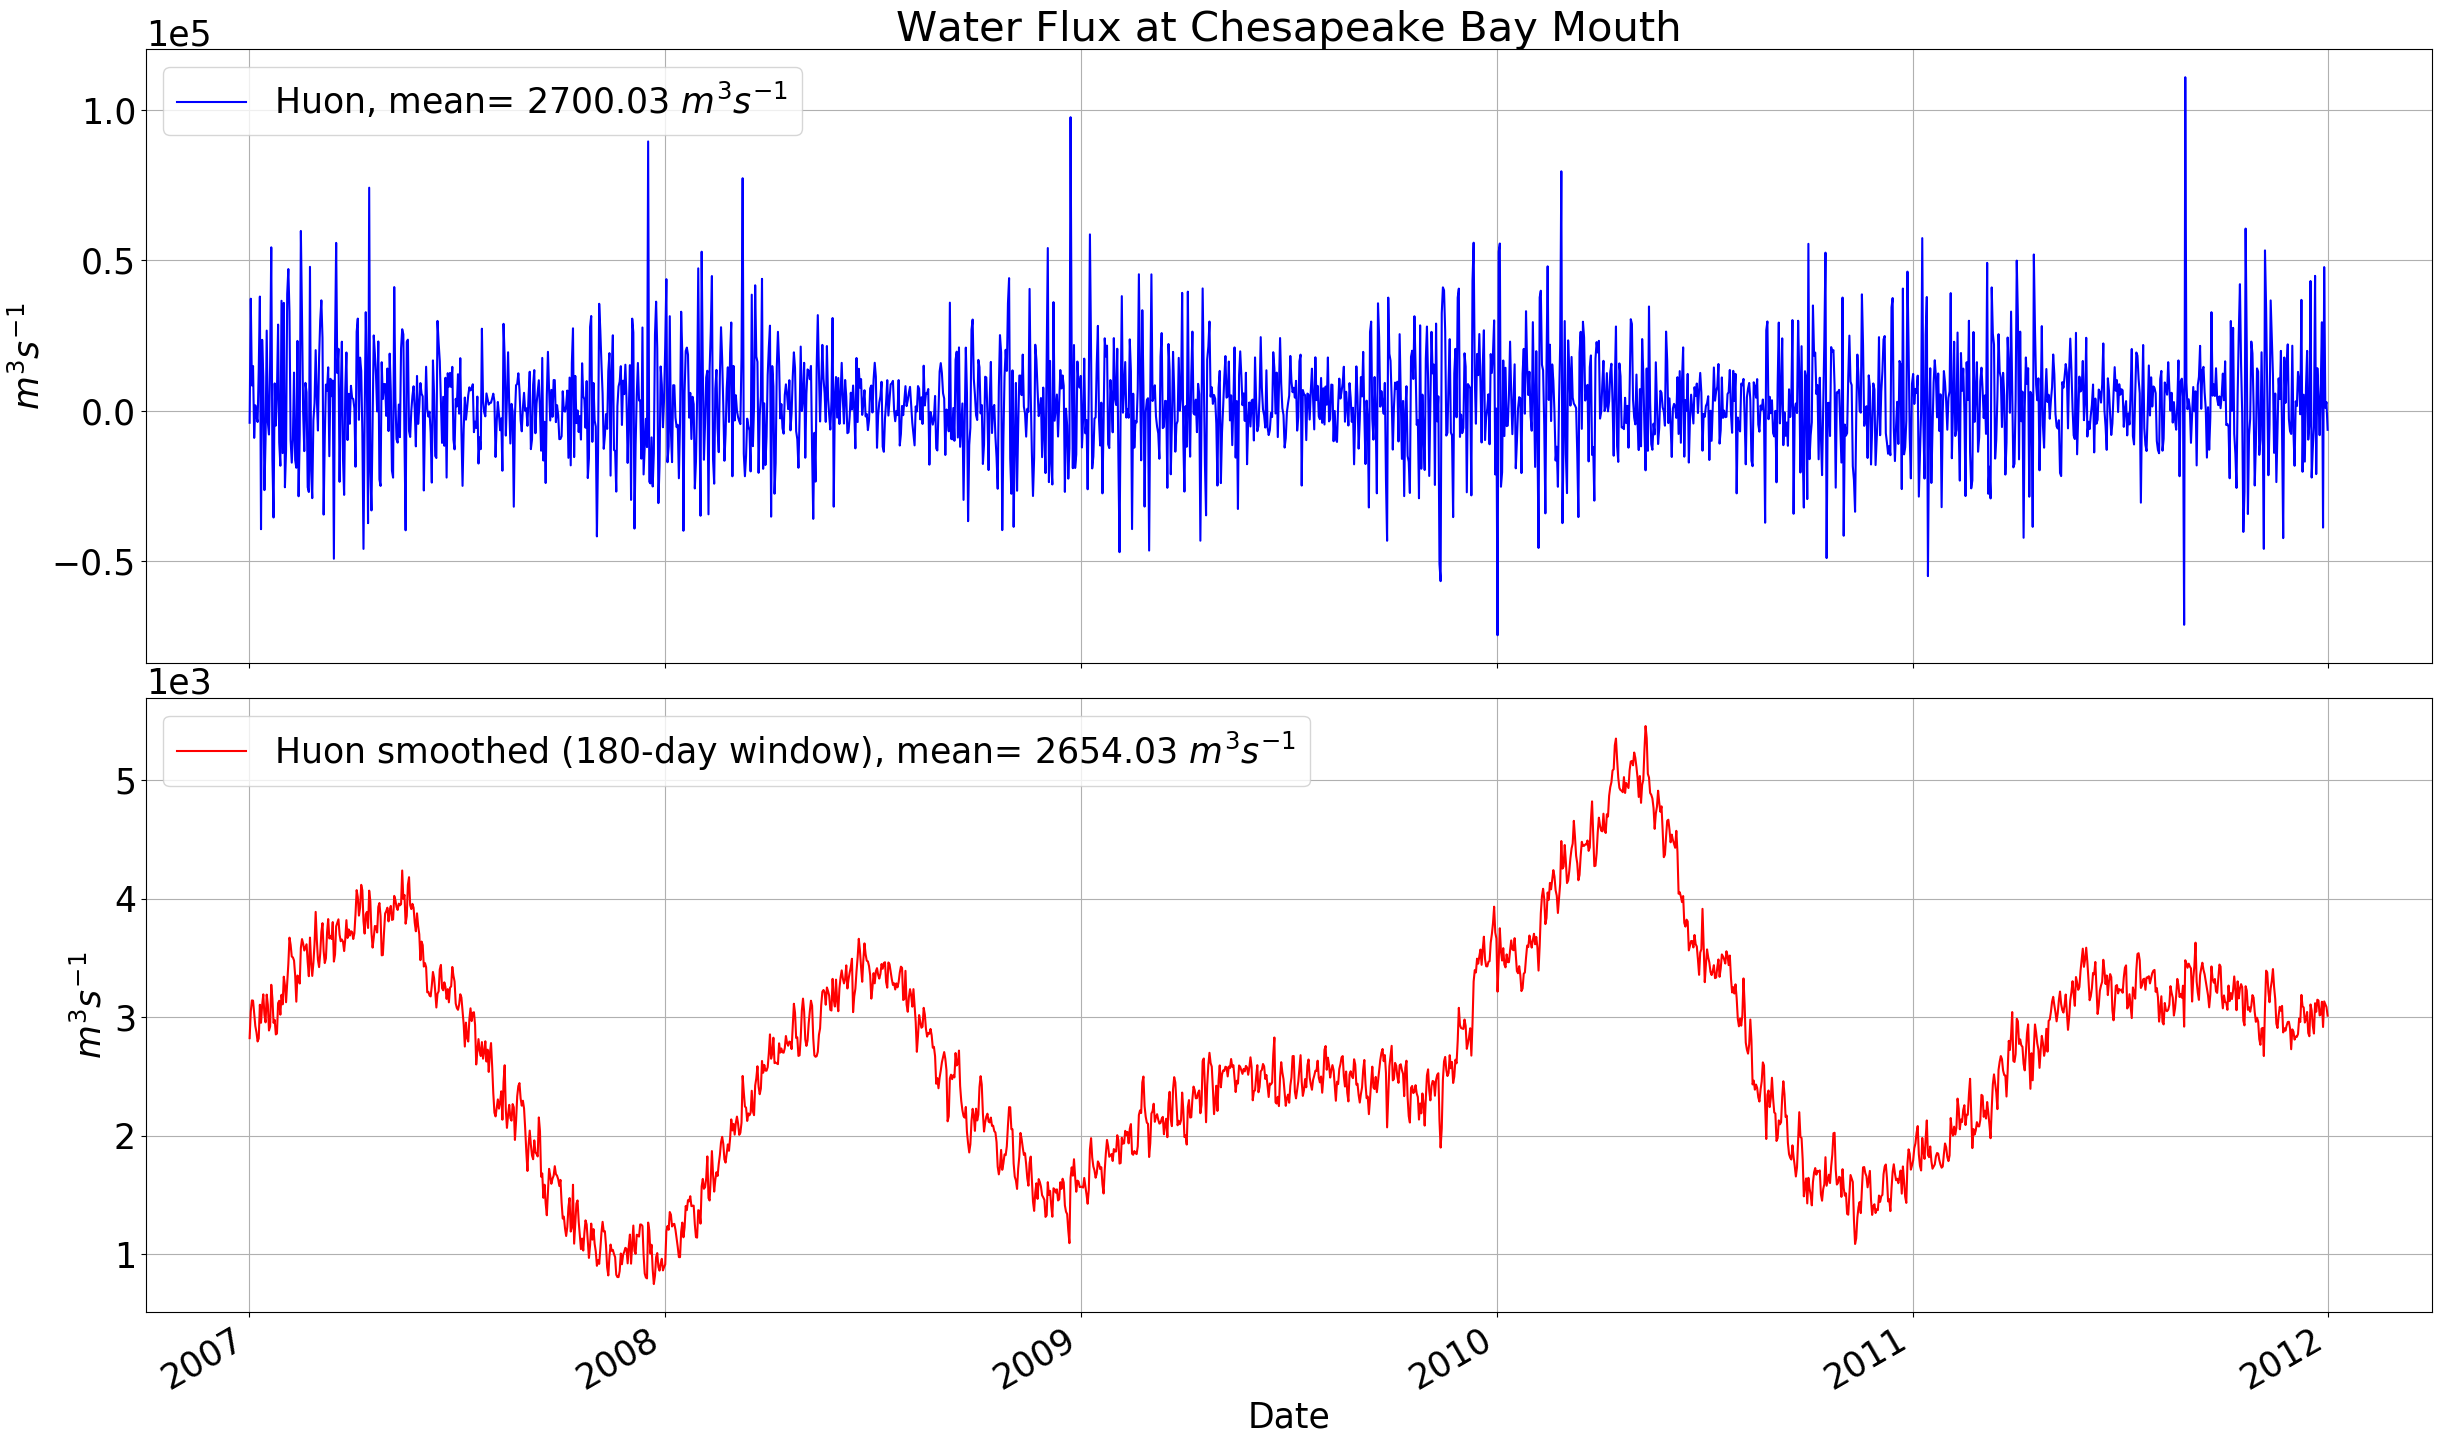

In [358]:
# sum over 2nd axis then sum over first axis
sum_Huon = Huon.sum(axis=2).sum(axis=1)

#rolling mean:
window = 180
sm=sum_Huon.rolling(ocean_time=window).mean()

# to get the dimension names
Huon.dims

# summing over dimensions
sum_Huon2 = Huon.sum(dim=['s_rho', 'eta_u'])

# plotting time series
f, ax = pl.subplots(nrows=2, sharex=True, figsize=(25, 15))
sum_Huon.sel(ocean_time=slice('2007','2011')).plot.line( 'b-', label=f'Huon, mean={float(sum_Huon.mean()): .2f}' + ' $m^3 s^{-1}$', ax=ax[0])
ax[0].set_ylabel('$m^3 s^{-1}$')
ax[0].legend()
ax[0].set_title('Water Flux at Chesapeake Bay Mouth')
ax[0].grid()
sm.sel(ocean_time=slice('2007','2011')).plot.line('r-', label=f'Huon smoothed ({window}-day window), mean={float(sm.mean()): .2f}' + ' $m^3 s^{-1}$', ax=ax[1])
ax[1].set_ylabel('$m^3 s^{-1}$')
ax[1].set_xlabel('Date')
ax[1].legend();
ax[1].grid()
f.tight_layout(h_pad=0.01)

# assert equality of two data arrays
xr.testing.assert_equal(sum_Huon,sum_Huon2)

f.savefig('Figures/Huon_CBM.png',dpi=300)

In [329]:
f.savefig('Figures/Huon_CBM.png',dpi=300)

In [331]:
float(mn)

2695.931059300569

In [332]:
"""Get the mean Huon in m3/s - positive is seaward"""
np.mean(sum_Huon)

<xarray.DataArray 'Huon' ()>
array(2700.0331634748154)

In [333]:
Huon_DOC.shape

(2191, 20, 15)

In [334]:
Huon.shape

(2191, 20, 15)

In [335]:
sum_Huon_DOC = Huon_DOC.sum(dim=['s_rho', 'eta_u'])
"""m3/s x mmol-C/m3 to Tg-C/yr"""
sum_Huon_DOC = sum_Huon_DOC*12*1e-3*86400*365*1e-12

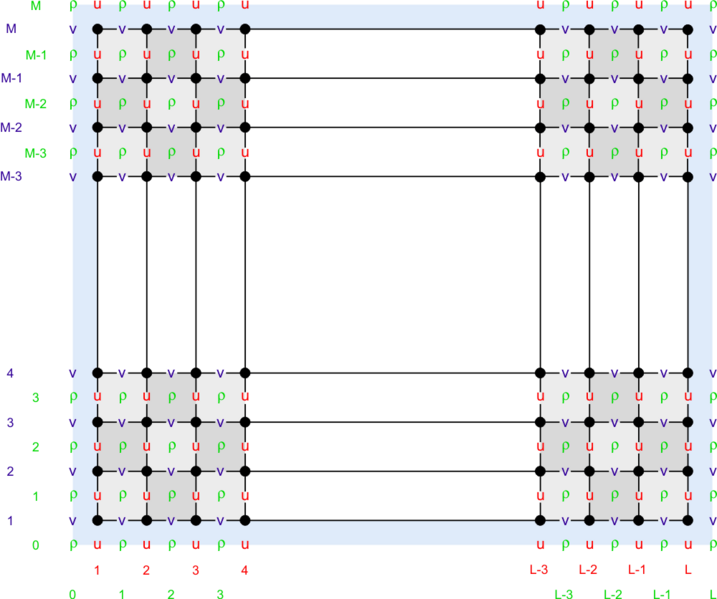

In [374]:
# Horizontal discretization of grid cells - significant for Hvom*DOC calculation 
from IPython.display import Image
Image(filename='Figures/717px-staggered_grid_rho_cells.png')

In [336]:
"""Daily Huon*DOC"""
DOCslb1 =ds.sel(ocean_time=slice('2006','2011'),xi_rho=59,eta_rho=slice(10, 25)).semilabileDOC
DOCslb2 =ds.sel(ocean_time=slice('2006','2011'),xi_rho=60,eta_rho=slice(10, 25)).semilabileDOC
DOCslb = 0.5*(DOCslb1 + DOCslb2)
DOCrfr1 =ds.sel(ocean_time=slice('2006','2011'),xi_rho=59,eta_rho=slice(10, 25)).refractoryDOC
DOCrfr2 =ds.sel(ocean_time=slice('2006','2011'),xi_rho=60,eta_rho=slice(10, 25)).refractoryDOC
DOCrfr = 0.5*(DOCrfr1 + DOCrfr2)
DOC=DOCslb + DOCrfr
HuonDOC=np.multiply(Huon, DOC)
sum_HuonDOC = HuonDOC.sum(dim=['s_rho', 'eta_u'])
"""m3/s x mmol-C/m3 to Tg-C/yr"""
sum_HuonDOC = sum_HuonDOC*12*1e-3*86400*365*1e-12
sm_HuonDOC=sum_HuonDOC.rolling(ocean_time=window).mean()

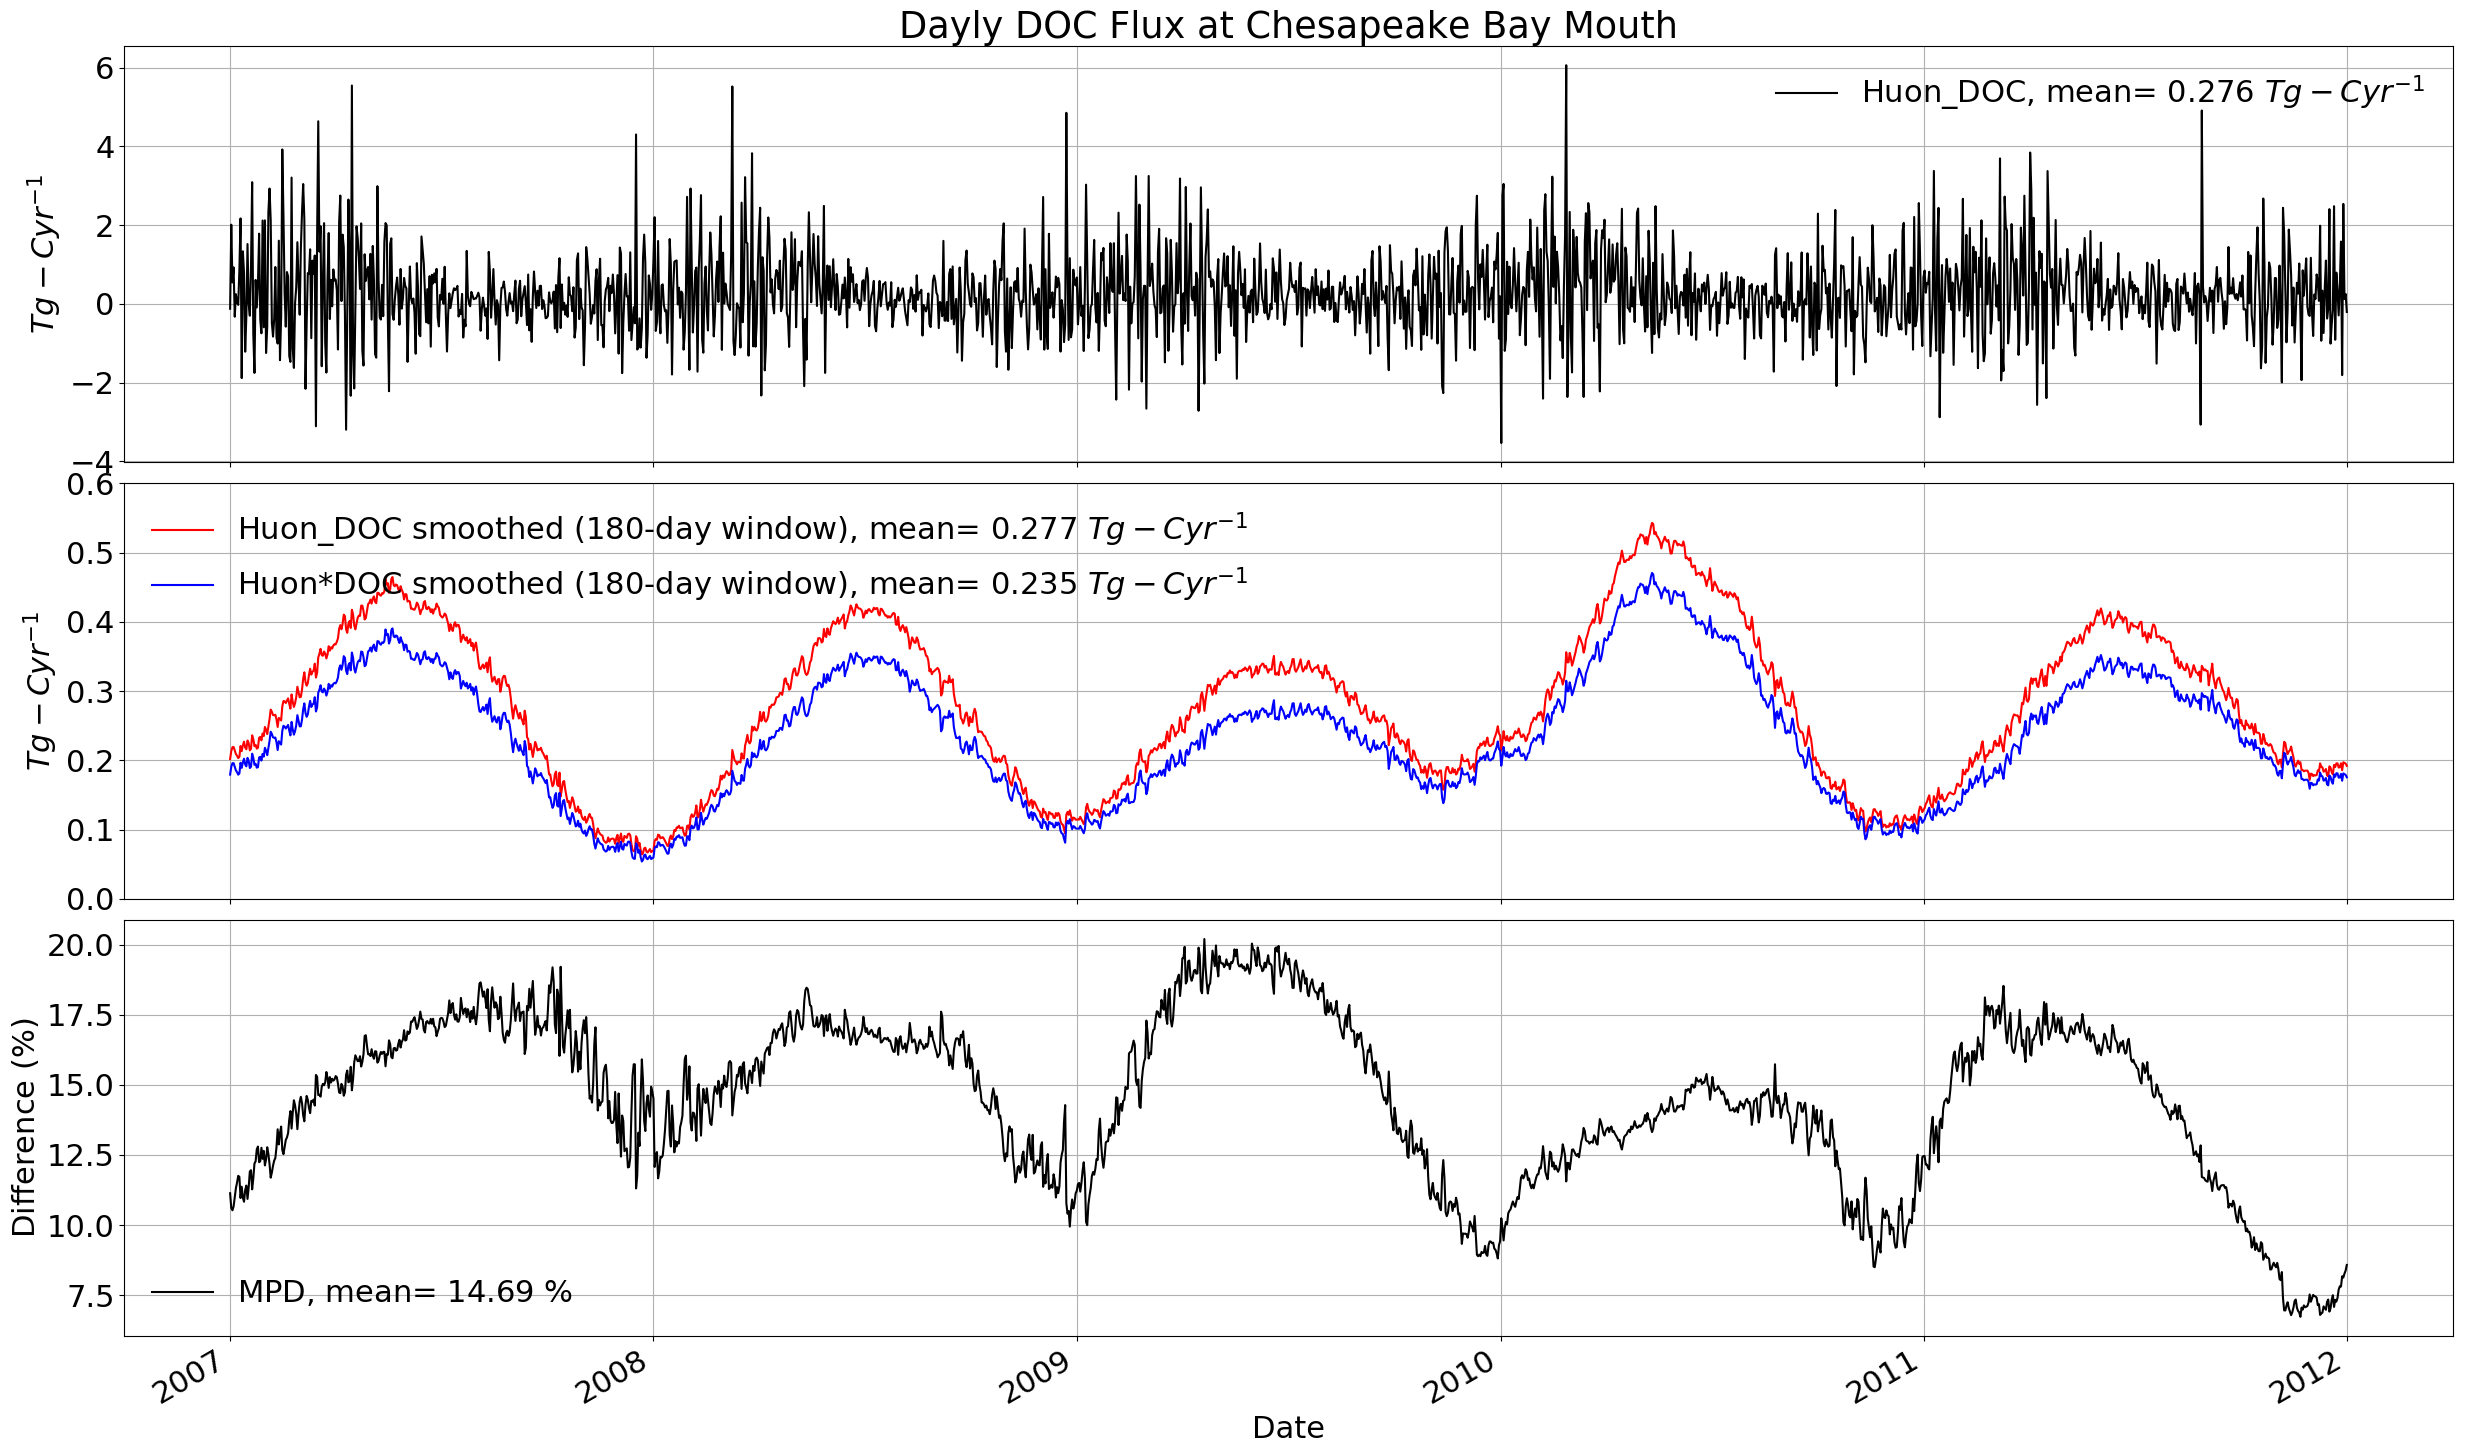

In [375]:
# plotting time series of DOC flux
sm=sum_Huon_DOC.rolling(ocean_time=window).mean()

f, ax = pl.subplots(nrows=3, sharex=True, figsize=(25, 15))
# Daily Huon_DOC
yplot1 = sum_Huon_DOC.sel(ocean_time=slice('2007','2011'))
yplot1.plot.line( 'k-',
    label=f'Huon_DOC, mean={float(yplot1.mean()): .3f}' + ' $Tg-C yr^{-1}$', ax=ax[0])
ax[0].set_ylabel('$Tg-C yr^{-1}$')
ax[0].legend(frameon=False)
ax[0].set_title('Dayly DOC Flux at Chesapeake Bay Mouth')
ax[0].grid()
# Huon_DOC smoothed with rolling averages
yplot2 = sm.sel(ocean_time=slice('2007','2011'))
yplot2.plot.line('r-',
    label=f'Huon_DOC smoothed ({window}-day window), mean={float(yplot2.mean()): .3f}' +
    ' $Tg-C yr^{-1}$', ax=ax[1])
ax[1].set_ylim([0,0.6])
ax[1].set_ylabel('$Tg-C yr^{-1}$')
ax[1].legend(frameon=False);
yplot3 = sm_HuonDOC.sel(ocean_time=slice('2007','2011'))
# Huon*DOC smoothed with rolling averages
yplot3.plot.line('b-',
    label=f'Huon*DOC smoothed ({window}-day window), mean={float(yplot3.mean()): .3f}' +
    ' $Tg-C yr^{-1}$', ax=ax[1])
ax[1].set_ylim([0,0.6])
ax[1].set_ylabel('$Tg-C yr^{-1}$')
ax[1].set_xlabel('Date')
ax[1].legend(frameon=False);
ax[1].grid()
# Difference between the two methos
MPD = 100*(sm - sm_HuonDOC)/sm
yplot4 = MPD.sel(ocean_time=slice('2007','2011'))
yplot4.plot.line('k-',
    label=f'MPD, mean={float(MPD.mean()): .2f}' + ' $\%$', ax=ax[2])
ax[2].set_ylabel('Difference ($\%$)')
ax[2].set_xlabel('Date')
ax[2].legend(frameon=False)
ax[2].grid()
f.tight_layout(h_pad=0.01)
f.savefig('Figures/Huon_DOCflux_CBM.png',dpi=300)


In [319]:
mean_DOC = DOC.mean(dim=['s_rho', 'eta_rho'])

In [320]:
mean_DOC.shape

(2191,)

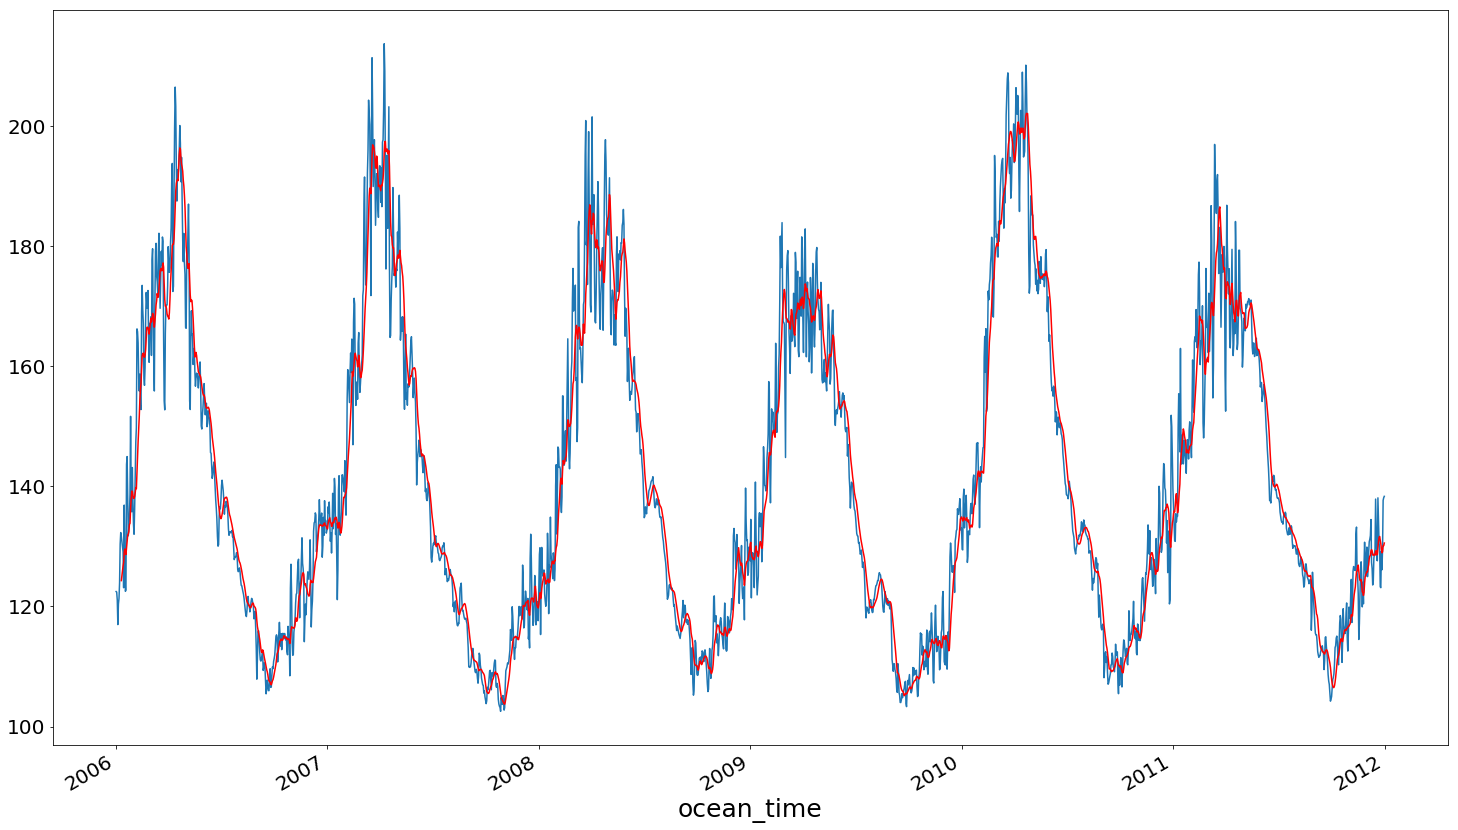

In [321]:
# plotting time series
f, ax=pl.subplots(figsize=(25, 15))
# raw time series
mean_DOC.plot.line(ax=ax);
#rolling mean:
sm=mean_DOC.rolling(ocean_time=10).mean()
# smoothed time series (10day rolling window)
sm.plot.line(ax=ax, color='r')